In [189]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [190]:
#reading our file
data = pd.read_csv("weatherHistory.csv")
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [191]:
#removing outliers
spread = data.describe().T
IQR = spread['75%'] - spread['25%']
spread['outliers'] = (spread['min'] < (spread['25%'] - (3*IQR)))|(spread['max'] > (spread['75%'] - (3*IQR)))
spread.ix[spread.outliers]

,count,mean,std,min,25%,50%,75%,max,outliers
Temperature (C),96453.0,11.932678,9.551546,-21.822222,4.688889,12.0000,18.838889,39.905556,True
Apparent Temperature (C),96453.0,10.855029,10.696847,-27.716667,2.311111,12.0000,18.838889,39.344444,True
Humidity,96453.0,0.734899,0.195473,0.000000,0.600000,0.7800,0.890000,1.000000,True
Wind Speed (km/h),96453.0,10.810640,6.913571,0.000000,5.828200,9.9659,14.135800,63.852600,True
Wind Bearing (degrees),96453.0,187.509232,107.383428,0.000000,116.000000,180.0000,290.000000,359.000000,True
Visibility (km),96453.0,10.347325,4.192123,0.000000,8.339800,10.0464,14.812000,16.100000,True
Pressure (millibars),96453.0,1003.235956,116.969906,0.000000,1011.900000,1016.4500,1021.090000,1046.380000,True


In [192]:
#getting detail information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [193]:
#checking what columns we have
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [194]:
data['Temperature (C)'] = data['Temperature (C)'].replace(0, np.mean(data['Temperature (C)']))
data['Humidity'] = data['Humidity'].replace(0, np.mean(data['Humidity']))
data['Wind Speed (km/h)'] = data['Wind Speed (km/h)'].replace(0, np.mean(data['Wind Speed (km/h)']))
data['Wind Bearing (degrees)'] = data['Wind Bearing (degrees)'].replace(0, np.mean(data['Wind Bearing (degrees)']))
data['Pressure (millibars)'] = data['Pressure (millibars)'].replace(0, np.mean(data['Pressure (millibars)']))


In [195]:
#dropping irreavant data
data = data.drop(['Formatted Date','Loud Cover',
       'Daily Summary', 'Visibility (km)'], axis=1)

In [196]:
#one hot coding on categorical data
data = pd.get_dummies( data)
data.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars),Summary_Breezy,Summary_Breezy and Dry,Summary_Breezy and Foggy,Summary_Breezy and Mostly Cloudy,...,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy,Precip Type_rain,Precip Type_snow
0,9.472222,7.388889,0.89,14.1197,251.0,1015.13,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,9.355556,7.227778,0.86,14.2646,259.0,1015.63,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,9.377778,9.377778,0.89,3.9284,204.0,1015.94,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,8.288889,5.944444,0.83,14.1036,269.0,1016.41,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,8.755556,6.977778,0.83,11.0446,259.0,1016.51,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [197]:
#checking shape of data
data.shape

(96453, 35)

In [198]:
#cheching for null values
data.isnull().sum()

Temperature (C)                                0
Apparent Temperature (C)                       0
Humidity                                       0
Wind Speed (km/h)                              0
Wind Bearing (degrees)                         0
Pressure (millibars)                           0
Summary_Breezy                                 0
Summary_Breezy and Dry                         0
Summary_Breezy and Foggy                       0
Summary_Breezy and Mostly Cloudy               0
Summary_Breezy and Overcast                    0
Summary_Breezy and Partly Cloudy               0
Summary_Clear                                  0
Summary_Dangerously Windy and Partly Cloudy    0
Summary_Drizzle                                0
Summary_Dry                                    0
Summary_Dry and Mostly Cloudy                  0
Summary_Dry and Partly Cloudy                  0
Summary_Foggy                                  0
Summary_Humid and Mostly Cloudy                0
Summary_Humid and Ov

In [199]:
#checking for null values
data.isna().any()

Temperature (C)                                False
Apparent Temperature (C)                       False
Humidity                                       False
Wind Speed (km/h)                              False
Wind Bearing (degrees)                         False
Pressure (millibars)                           False
Summary_Breezy                                 False
Summary_Breezy and Dry                         False
Summary_Breezy and Foggy                       False
Summary_Breezy and Mostly Cloudy               False
Summary_Breezy and Overcast                    False
Summary_Breezy and Partly Cloudy               False
Summary_Clear                                  False
Summary_Dangerously Windy and Partly Cloudy    False
Summary_Drizzle                                False
Summary_Dry                                    False
Summary_Dry and Mostly Cloudy                  False
Summary_Dry and Partly Cloudy                  False
Summary_Foggy                                 

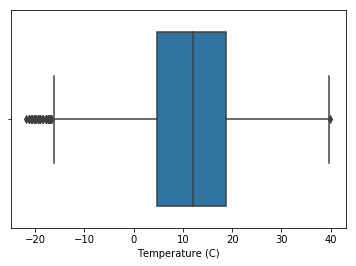

In [200]:
#printing data in boxplot 
sb.boxplot(data['Temperature (C)'])

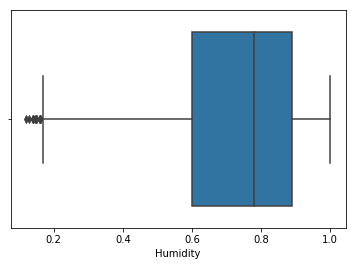

In [201]:
#printing data in boxplot
sb.boxplot(data['Humidity'])

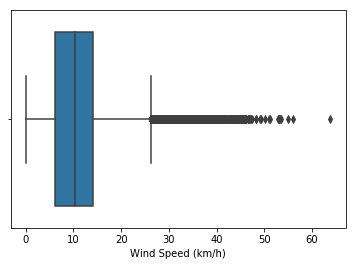

In [202]:
#printing data in boxplot
sb.boxplot(data['Wind Speed (km/h)'])

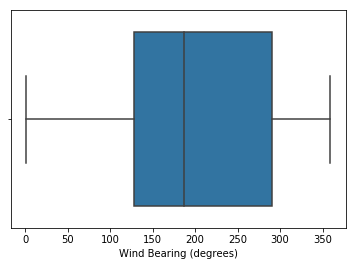

In [203]:
#printing data in boxplot
sb.boxplot(data['Wind Bearing (degrees)'])

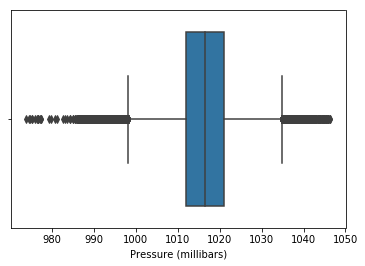

In [204]:
#printing data in boxplot
sb.boxplot(data['Pressure (millibars)'])

(array([  145.,  1697.,  5053.,  6247.,  6596.,  8693., 11905., 15631.,
        19796., 20690.]),
 array([0.12 , 0.208, 0.296, 0.384, 0.472, 0.56 , 0.648, 0.736, 0.824,
        0.912, 1.   ]),
 <a list of 10 Patch objects>)

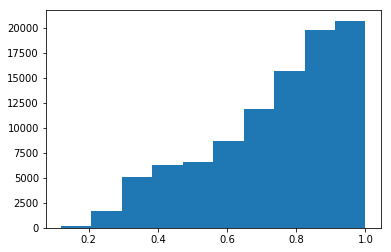

In [205]:
#printing data in histogram
plt.hist(data['Humidity'])

(array([1.6000e+01, 5.8000e+01, 6.4600e+02, 2.5100e+03, 1.3913e+04,
        3.6229e+04, 2.9447e+04, 1.0020e+04, 3.1870e+03, 4.2700e+02]),
 array([ 973.78,  981.04,  988.3 ,  995.56, 1002.82, 1010.08, 1017.34,
        1024.6 , 1031.86, 1039.12, 1046.38]),
 <a list of 10 Patch objects>)

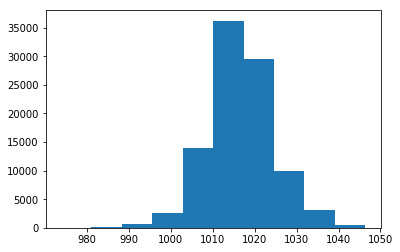

In [206]:
#printing data in histogram
plt.hist(data['Pressure (millibars)'])

(array([2.6966e+04, 3.8879e+04, 1.8880e+04, 7.9390e+03, 2.6490e+03,
        8.7000e+02, 2.1600e+02, 4.5000e+01, 8.0000e+00, 1.0000e+00]),
 array([3.220000e-02, 6.414240e+00, 1.279628e+01, 1.917832e+01,
        2.556036e+01, 3.194240e+01, 3.832444e+01, 4.470648e+01,
        5.108852e+01, 5.747056e+01, 6.385260e+01]),
 <a list of 10 Patch objects>)

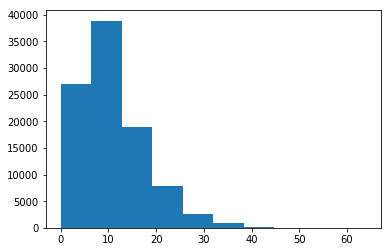

In [207]:
#printing data in histogram
plt.hist(data['Wind Speed (km/h)'])

(array([   54.,   494.,  3550., 15072., 20497., 20647., 19286., 11334.,
         4833.,   686.]),
 array([-21.82222222, -15.64944444,  -9.47666667,  -3.30388889,
          2.86888889,   9.04166667,  15.21444444,  21.38722222,
         27.56      ,  33.73277778,  39.90555556]),
 <a list of 10 Patch objects>)

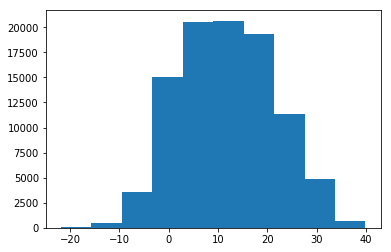

In [208]:
#printing data in histogram
plt.hist(data['Temperature (C)'])

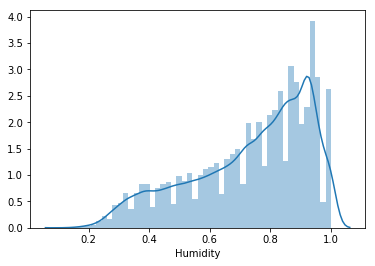

In [209]:
#printing data in displot
sb.distplot(data['Humidity'])

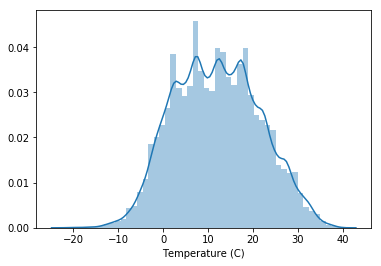

In [210]:
#printing data in displot
sb.distplot(data['Temperature (C)'])

In [211]:
print("Mean is", data['Humidity'].mean(), data['Humidity'].skew(), ", Median is ", data['Humidity'].median(), "which shows that column data are skwed data")


Mean is 0.7350665897095483 -0.709753971961163 , Median is  0.78 which shows that column data are skwed data


Skewness is -0.29332761199192986


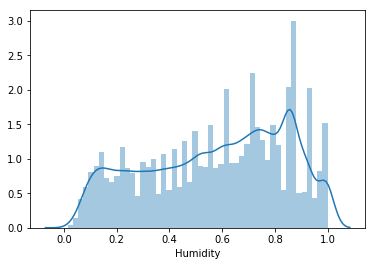

In [212]:
# now transforming feature variable
target = (np.square((data.Humidity)))
print ('Skewness is', target.skew())
sb.distplot(target)

In [213]:
print("Mean is", data['Temperature (C)'].mean(), data['Temperature (C)'].skew(), ", Median is ", data['Temperature (C)'].median(), "which shows that column data are skwed data")


Mean is 11.972885797492358 0.0888366904898832 , Median is  12.0 which shows that column data are skwed data


In [214]:
print("Mean is", data['Pressure (millibars)'].mean(), data['Pressure (millibars)'].skew(), ", Median is ", data['Pressure (millibars)'].median(), "which shows that column data are skwed data")


Mean is 1016.6328218006744 0.07820897390796543 , Median is  1016.45 which shows that column data are skwed data


In [215]:
print("Mean is", data['Wind Speed (km/h)'].mean(), data['Wind Speed (km/h)'].skew(), ", Median is ", data['Wind Speed (km/h)'].median(), "which shows that column data are skwed data")


Mean is 10.956010427488343 1.1614861209171388 , Median is  10.3201 which shows that column data are skwed data


Skewness is -0.13061836259664358


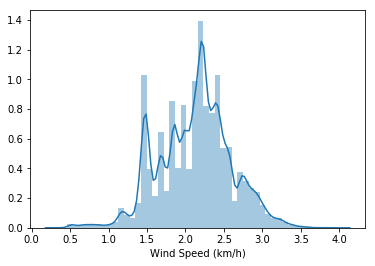

In [216]:
# now transforming feature variable
target = (np.cbrt((data['Wind Speed (km/h)'])))
print ('Skewness is', target.skew())
sb.distplot(target)

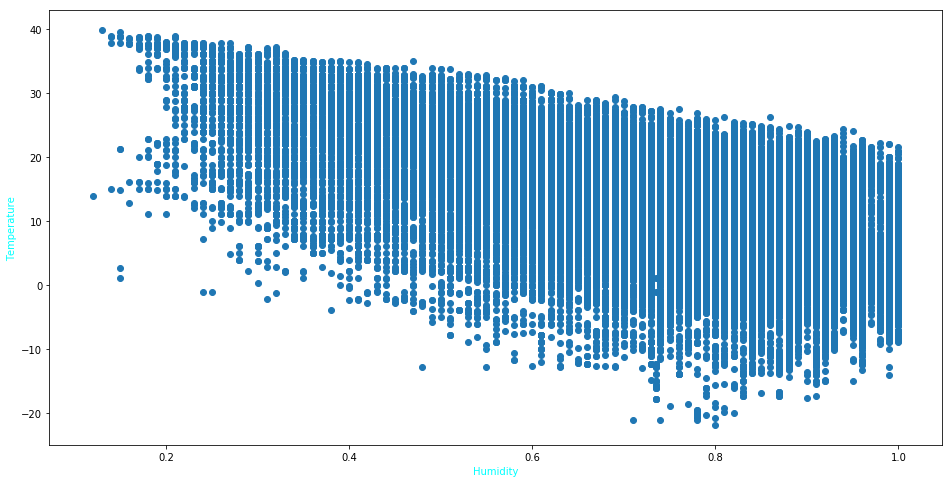

In [217]:
#ploting graph to check distribution
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['Humidity'], data['Temperature (C)'])
ax.set_xlabel('Humidity', color = 'cyan')
ax.set_ylabel('Temperature', color = 'cyan')
plt.show()

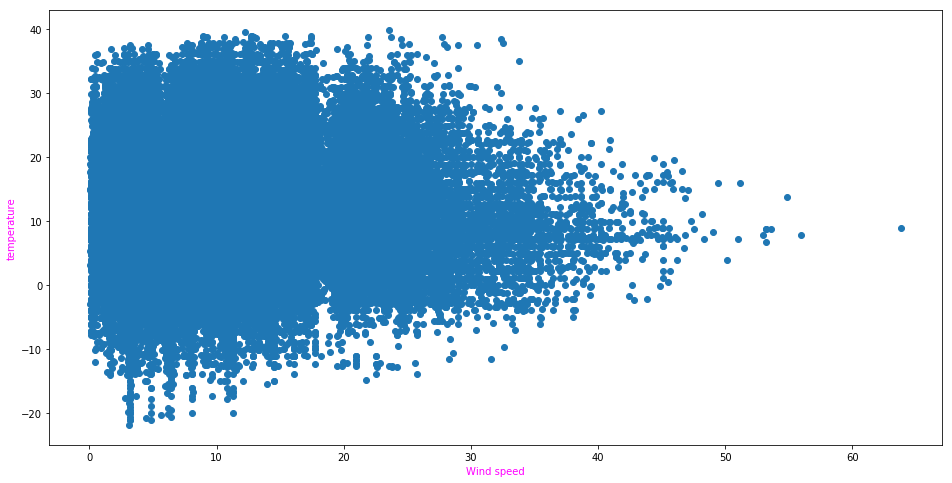

In [218]:
#ploting graph to check distribution
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['Wind Speed (km/h)'], data['Temperature (C)'])
ax.set_xlabel('Wind speed', color = 'magenta')
ax.set_ylabel('temperature', color= 'magenta')
plt.show()

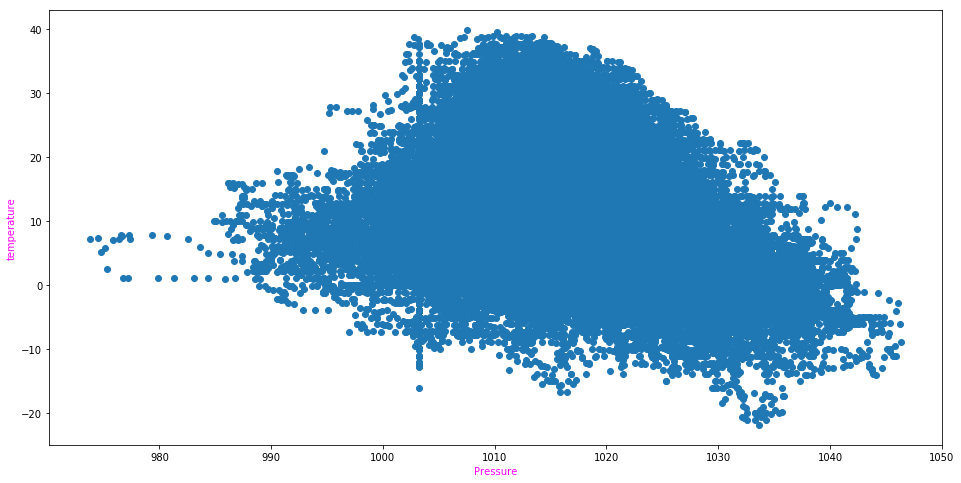

In [219]:
#ploting graph to check distribution
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['Pressure (millibars)'], data['Temperature (C)'])
ax.set_xlabel('Pressure', color = 'magenta')
ax.set_ylabel('temperature', color= 'magenta')
plt.show()

In [220]:
#creating a class for multi linear regression
class MultiLinearRegression:

    def __init__(self):
        self.alpha = 0.0009
        self.iters = 9000

    def normalize(self,features):
        # we transpose the input matrix , swapping columns and rows to make vector math easier

        for i in features.T:
            fmean = np.mean(features)
            frange = np.amax(features) - np.amin(features)

            features -= fmean
            features /= frange

        return features

    def standardization(self, x_data):
        result = np.array([])
        for i in range(len(x_data)):
            x_std = (x_data[i] - np.mean(x_data)) / np.std(x_data)
            result = np.append(x_std, result)
        return result

    def remove_outlier(self, data):
        low = .05
        high = .95
        quant_df = data.quantile([low, high])
        for name in list(data.columns):
            if pd.is_numeric_dtype(data[name]):
                data = data[(data[name] > quant_df.loc[low, name]) & (data[name] < quant_df.loc[high, name])]
        return data


    def predict(self,features, parameters):
        parameters = parameters.T
        return np.dot(features, parameters)

    #compute cost function
    def computeCost(self,x_data,y_data,theta):
        
        error = np.power(((X @ theta.T)-y),2)
        return np.sum(error)/(2 * len(X))
    
       #compute gradient descent
    def gradientDescent(self, x_data,y_data,theta):
        cost = np.zeros(self.iters)
        
        for i in range(self.iters):
            
            theta = theta - (self.alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
            cost[i] = self.computeCost(X, y, theta)

        return theta,cost
    
    def accuracy(self, y_test_data, y_pred):
        total_error = 0
        for i in range(len(y_test_data)):
            if y_test_data[i] == 0:
                pass
            else:
                total_error += (abs((y_pred[i] - y_test_data[i]) / y_test_data[i]))

        total_error = total_error / len(y_test_data)
        accuracy = (total_error) * 100

        return accuracy

[[10.81204457 10.09342508 -0.41998047 -0.94202961  0.09263525 -0.238947  ]]
1.1233405634169626
accuracy train:  [50.02509053] accuracy test:  [53.34397659]
MSE test:  1.5300607865510827
MSE train:  2.2466811268339253


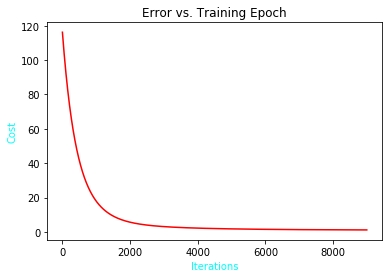

In [221]:
def main():
   
    #separating features and label
    features = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
                'Pressure (millibars)']
    label = ['Apparent Temperature (C)']
    
    x_df = data[features]
    y_df = data[label]
    
    #standarizing the data
    x_df = (x_df - x_df.mean()) / x_df.std()

    x_data_set = np.array(pd.DataFrame(x_df, columns=features))
    y_data_set = np.array(pd.DataFrame(y_df, columns=label))

    mlr = MultiLinearRegression()
    
    #creating a zero vector for theat
    theta_vector = np.zeros(((len(features) + 1), 1), dtype='f')
    theta_vector = theta_vector.T
    
    
    size = [x_data_set.shape]
    columns = size[0][1]
    train_size = int(np.ceil((len(y_data_set) * 0.80)))
    test_size = int(len(y_data_set) - train_size)

    #Training data
    x_data_train = np.array(x_data_set[:train_size])
    y_data_train = np.array(y_data_set[:train_size])
    
    #Testing data
    x_data_test = np.array(x_data_set[train_size:])
    y_data_test = np.array(y_data_set[train_size:])

    size = [x_data_train.shape]
    size = size[0][1] + 1

    #assigning values of x0 in feature vector
    x_data_train = np.column_stack((np.ones((x_data_train.shape[0], 1)), x_data_train))

    x_data_test = np.column_stack((np.ones((x_data_test.shape[0], 1)), x_data_test))

    #running the gradient descent and cost function
    g,cost = mlr.gradientDescent(x_data_train,y_data_train,theta_vector)
    print(g)

    finalCost = mlr.computeCost(x_data_train,y_data_train,g)
    print(finalCost)
    
    y_prediction = mlr.predict(x_data_test, g)
    
    y_prediction_train = mlr.predict(x_data_train, g)
    

    accuracy = mlr.accuracy(y_data_test, y_prediction)
    accuracy_train = mlr.accuracy(y_data_train, y_prediction_train)

    print("accuracy train: ", accuracy_train, "accuracy test: ", accuracy)
    print("MSE test: ", mean_squared_error(y_data_test, y_prediction))
    print("MSE train: ", mean_squared_error(y_data_train, y_prediction_train))
    
    
    #plot the cost
    fig, ax = plt.subplots()  
    ax.plot(np.arange(9000), cost, 'r')  
    ax.set_xlabel('Iterations', color = 'cyan')  
    ax.set_ylabel('Cost', color = 'cyan')  
    ax.set_title('Error vs. Training Epoch') 



if __name__ == '__main__':
    main()
